In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

## Importing The Data

In [2]:
df = pd.read_excel('Air_BNB.xlsx')

In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.head(10)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
5,Private room,2.0,1.0,strict,1.0,t,100.0,1.0,1.0,4.442651
6,Entire home/apt,3.0,1.0,moderate,1.0,t,97.0,1.0,1.0,4.418841
7,Entire home/apt,2.0,1.0,moderate,1.0,f,93.0,1.0,1.0,4.787492
8,Private room,2.0,1.0,moderate,1.0,f,99.0,1.0,1.0,4.787492
9,Private room,2.0,1.0,moderate,1.0,t,90.0,1.0,1.0,3.583519


In [5]:
df.shape

(74111, 10)

In [6]:
print("The number of columns is ",df.shape[1])
print("The number of rows is ",df.shape[0])

The number of columns is  10
The number of rows is  74111


In [7]:
df.tail()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000
74110,Entire home/apt,4.0,1.0,moderate,0.0,f,96.0,1.0,2.0,4.852030


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [9]:
df.describe()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,74107.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,0.734060,94.067365,1.265797,1.710868,4.782069
std,2.153603,0.582054,0.441835,7.836556,0.852149,1.254142,0.717394
min,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,1.000000,100.000000,10.000000,18.000000,7.600402


In [10]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0
cleaning_fee,74107.0,0.73,0.44,0.0,0.00,1.00,1.00,1.0
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [11]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [12]:
print(df['room_type'].unique())
print()
print(df['room_type'].nunique())

['Entire home/apt' 'Private room' 'Shared room' nan]

3


In [13]:
df['room_type'].value_counts()

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

In [14]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"The {column.upper()} has : {df[column].nunique()} unique values")
        print(df[column].value_counts())
        print()

The ROOM_TYPE has : 3 unique values
room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

The CANCELLATION_POLICY has : 3 unique values
cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

The INSTANT_BOOKABLE has : 2 unique values
instant_bookable
f    54660
t    19451
Name: count, dtype: int64



In [53]:
df_1 = df.copy()

In [54]:
df_1.drop_duplicates(inplace=True)

In [55]:
df_1.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [56]:
df.shape

(74111, 10)

In [57]:
df_1.shape

(54117, 10)

In [58]:
df_1.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

In [59]:
df_1 = pd.get_dummies(df_1,columns=['room_type','cancellation_policy','instant_bookable'],drop_first=True,dtype=float)

In [60]:
df_1.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0


In [61]:
df_mean = df_1.copy()

# Null Value Treatment

In [62]:
for column in df_mean.columns:
    if df_mean[column].dtype != 'object':
        mean = df_mean[column].mean()
        df_mean[column] = df_mean[column].fillna(mean)

In [63]:
df_mean.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [64]:
df_med = df_1.copy()

In [65]:
for column in df_med.columns:
    if df_med[column].dtype != 'object':
        median = df_med[column].median()
        df_med[column] = df_med[column].fillna(median)

In [66]:
df_med.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [67]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_1)
df_knn = pd.DataFrame(data = df_imputed,columns=df_1.columns)

In [68]:
df_knn.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.2,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0


# Outlier Treatment

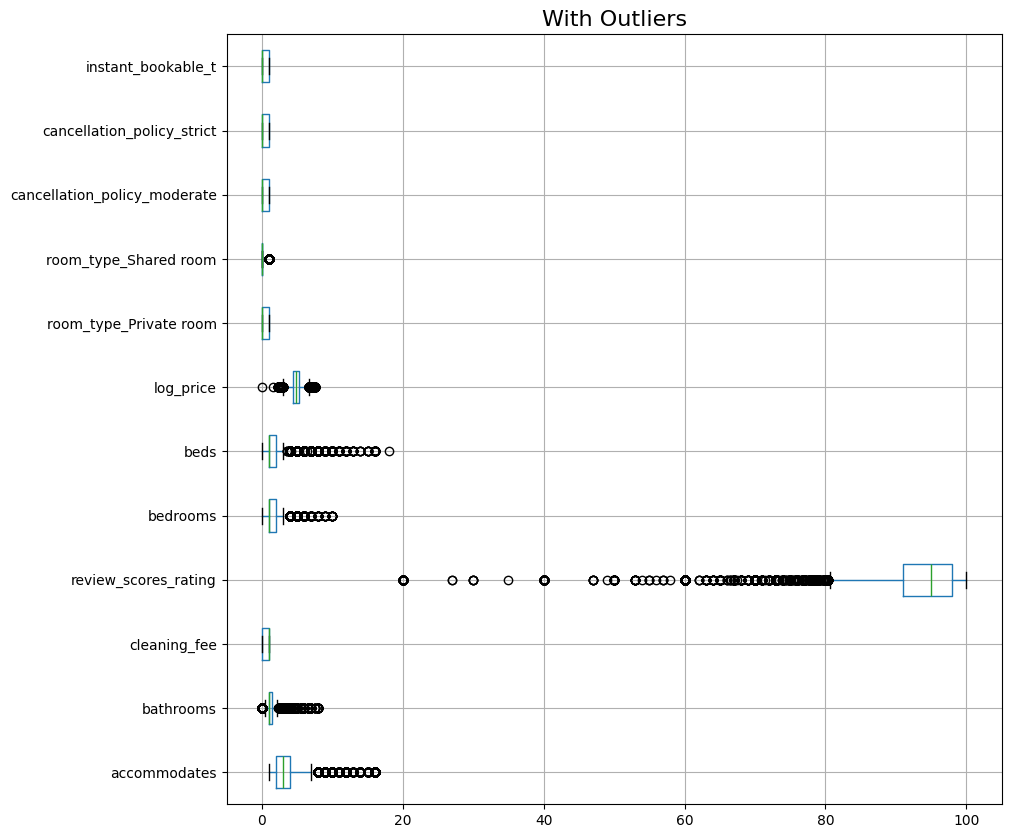

In [69]:
cont=df_knn.dtypes[(df_knn.dtypes!='uint8') & (df_knn.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_knn[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [70]:
df_mean.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0


In [71]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [72]:
remove_outlier(df_mean['review_scores_rating'])

(83.0, 107.0)

In [73]:
df_mean_out = df_mean.copy()
df_med_out = df_med.copy()
df_knn_out = df_knn.copy()

In [74]:
df_mean_out.shape

(54117, 12)

In [75]:
df_med_out.shape

(54117, 12)

In [76]:
df_knn_out.shape

(54117, 12)

In [77]:
for column in df_mean_out.columns:
    lr,ur=remove_outlier(df_mean_out[column])
    df_mean_out[column]=np.where(df_mean_out[column]>ur,ur,df_mean_out[column])
    df_mean_out[column]=np.where(df_mean_out[column]<lr,lr,df_mean_out[column])

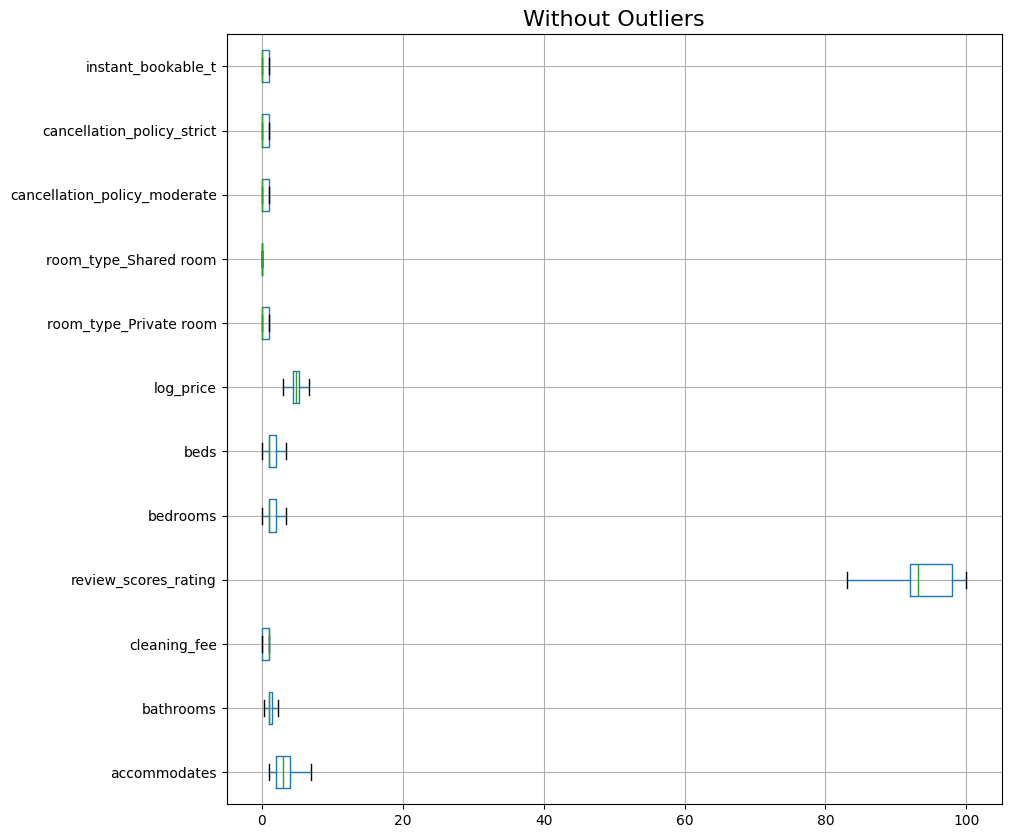

In [78]:
plt.figure(figsize=(10,10))
df_mean_out.boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [79]:
for column in df_med_out.columns:
    lr,ur=remove_outlier(df_med_out[column])
    df_med_out[column]=np.where(df_med_out[column]>ur,ur,df_med_out[column])
    df_med_out[column]=np.where(df_med_out[column]<lr,lr,df_med_out[column])

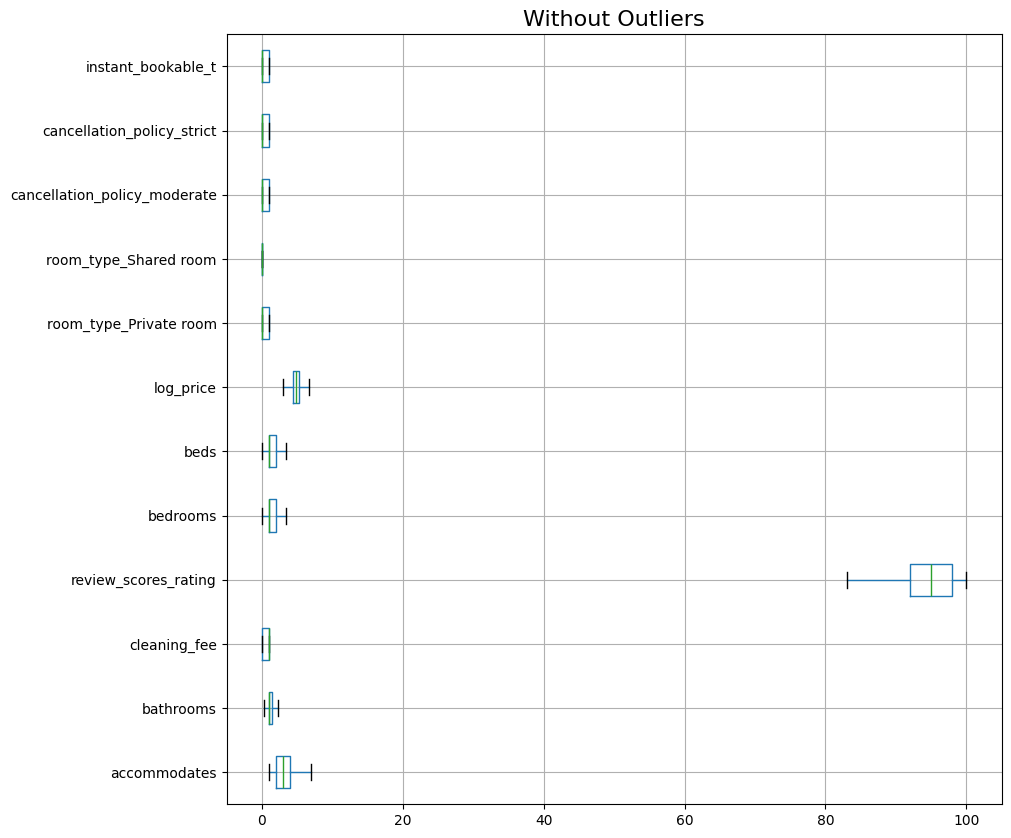

In [80]:
plt.figure(figsize=(10,10))
df_med_out.boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [81]:
for column in df_knn_out.columns:
    lr,ur=remove_outlier(df_knn_out[column])
    df_knn_out[column]=np.where(df_knn_out[column]>ur,ur,df_knn_out[column])
    df_knn_out[column]=np.where(df_knn_out[column]<lr,lr,df_knn_out[column])

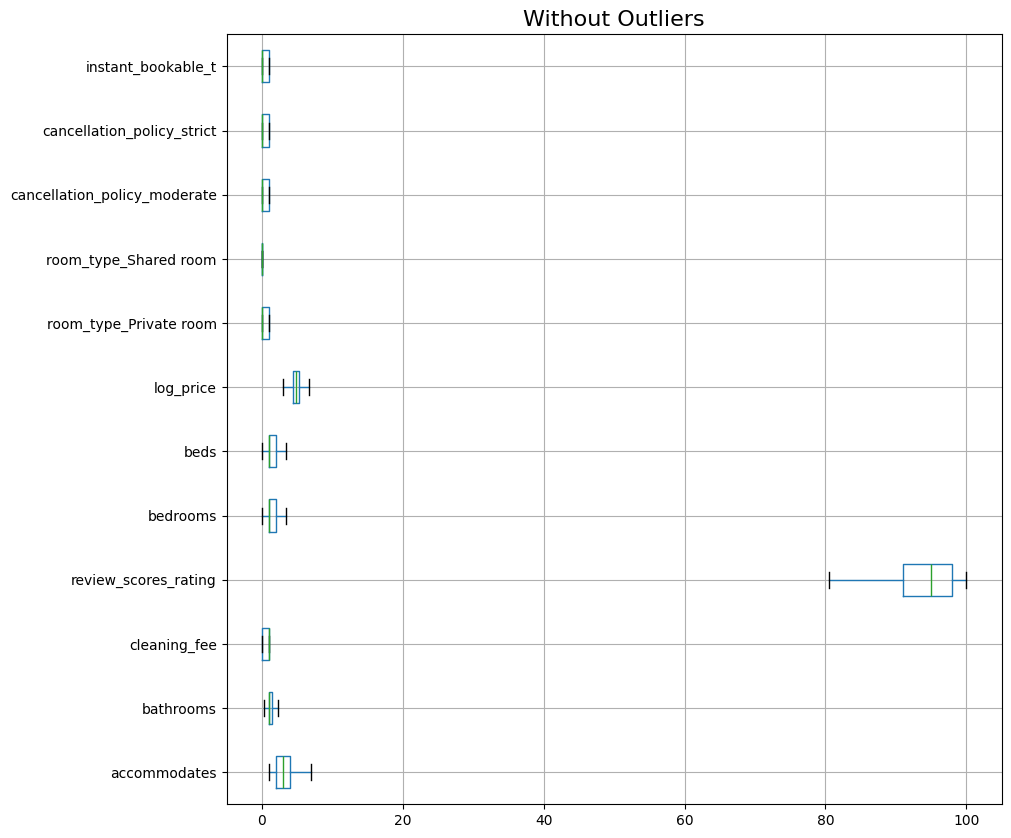

In [82]:
plt.figure(figsize=(10,10))
df_knn_out.boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

## Data Distribution

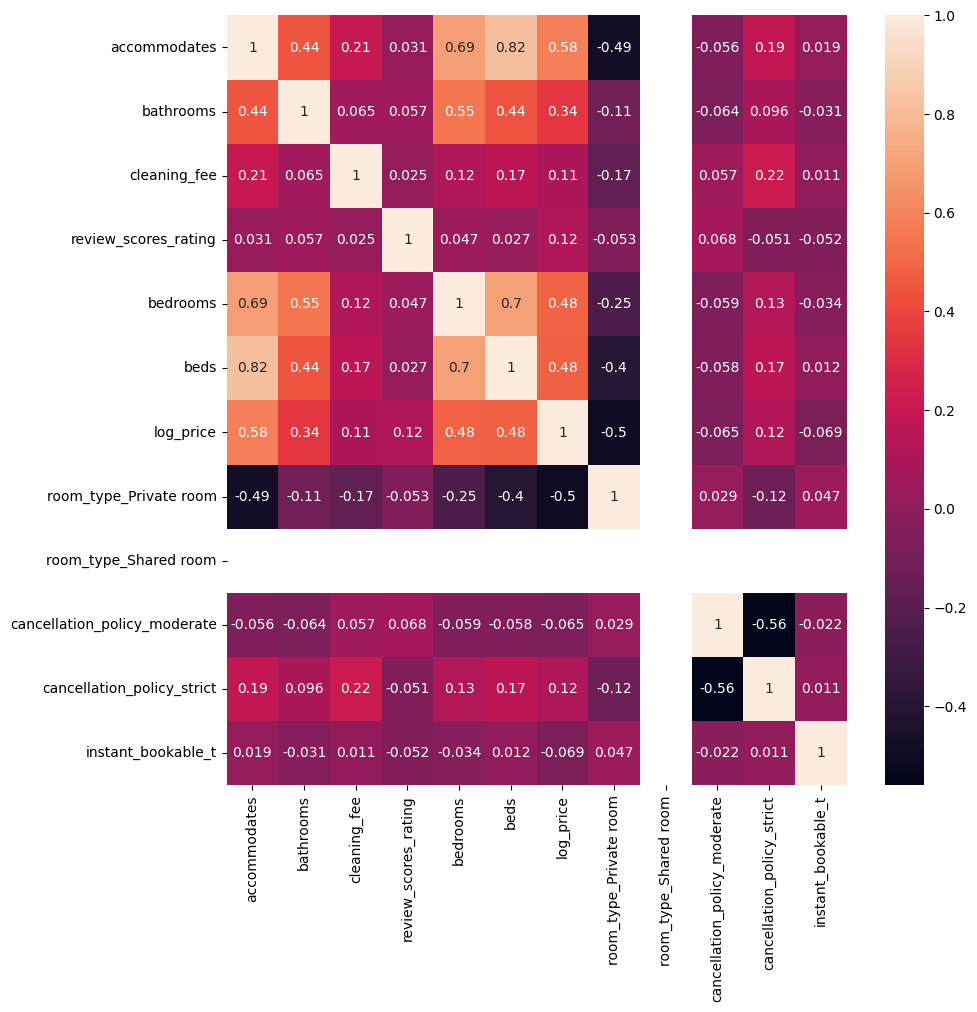

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mean_out.corr(),annot=True)
plt.show()

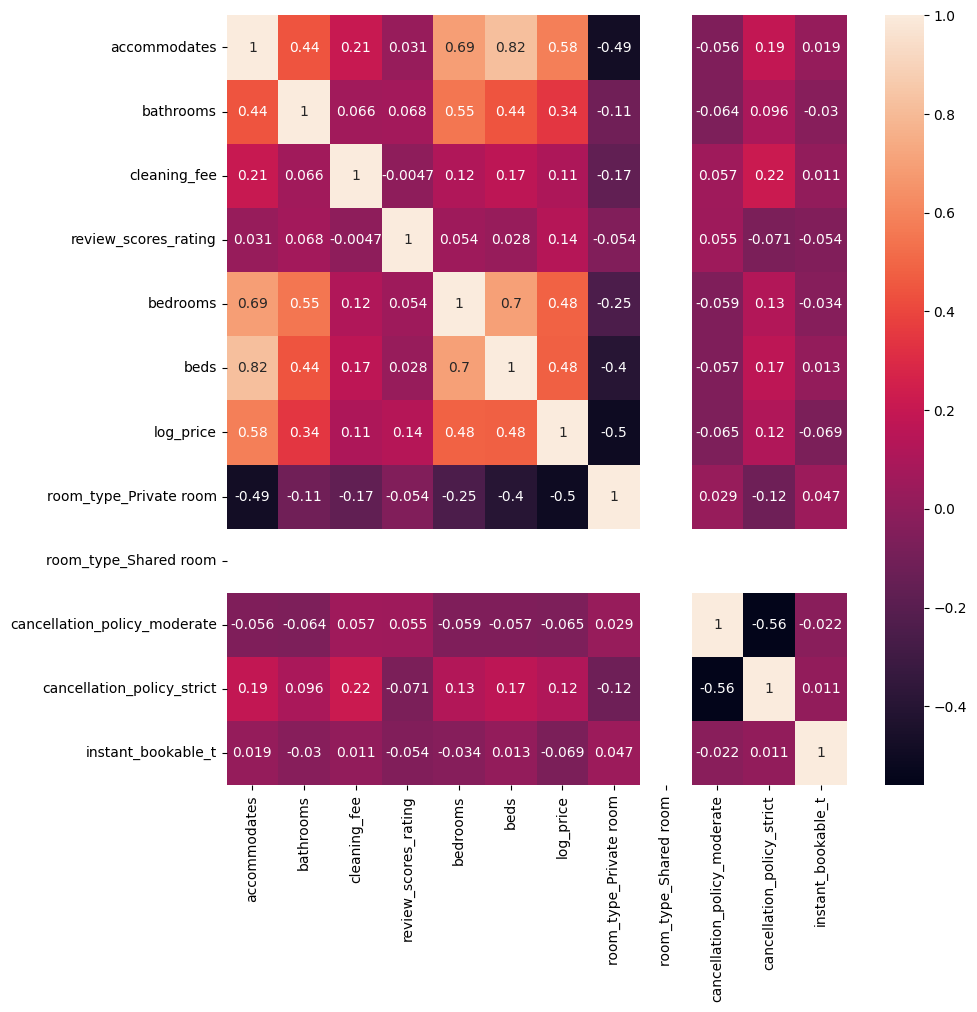

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(df_med_out.corr(),annot=True)
plt.show()

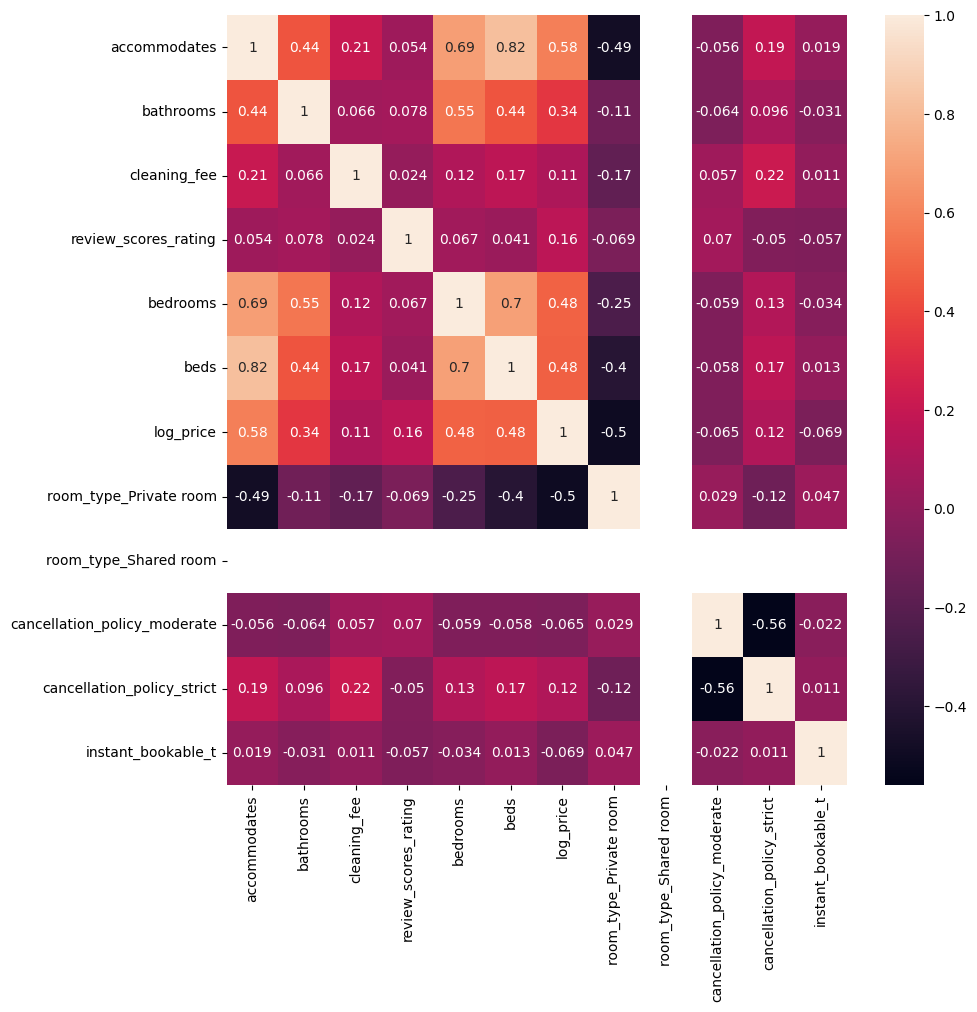

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(df_knn_out.corr(),annot=True)
plt.show()

In [89]:
from sklearn.model_selection import train_test_split

# Linear Regression Model

In [138]:
def linear_regession(data):
    X = data.drop('log_price', axis=1)
    # Copy target into the y dataframe. 
    y = data[['log_price']]
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

    # Linear regression Model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    return regression_model.score(X_train, y_train)

In [139]:
print("df_mean_out Model Score :",linear_regession(df_mean_out))
print("df_mean Model Score :",linear_regession(df_mean))
print("df_med_out Model Score :",linear_regession(df_med_out))
print("df_med Model Score :",linear_regession(df_med))
print("df_knn_out Model Score :",linear_regession(df_knn_out))
print("df_knn Model Score :",linear_regession(df_knn))

df_mean_out Model Score : 0.4453405404485786
df_mean Model Score : 0.5026453886994027
df_med_out Model Score : 0.4482835745841216
df_med Model Score : 0.5041739382604415
df_knn_out Model Score : 0.4508341542386194
df_knn Model Score : 0.5053521305008037


In [140]:
df_1.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0


In [141]:
X = df_knn.drop('log_price', axis=1)
# Copy target into the y dataframe. 
y = df_knn[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [142]:
# Linear regression Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_train, y_train)

0.5053521305008037

In [143]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
25136,7.0,1.0,0.0,100.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,4.709530
6288,1.0,2.0,0.0,99.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.806662
36561,2.0,1.0,0.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.844187
2034,16.0,1.0,1.0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.396930
21668,3.0,1.0,0.0,95.8,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.499810


In [144]:
data_train.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'instant_bookable_t', 'log_price'],
      dtype='object')

In [145]:
data_train['room_type_Private'] = data_train['room_type_Private room']
data_train['room_type_Shared'] = data_train['room_type_Shared room']

In [146]:
data_train.drop(['room_type_Private room','room_type_Shared room'],axis=1,inplace=True)

In [147]:
data_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price,room_type_Private,room_type_Shared
25136,7.0,1.0,0.0,100.0,1.0,3.0,0.0,0.0,0.0,4.709530,0.0,0.0
6288,1.0,2.0,0.0,99.0,1.0,1.0,0.0,1.0,1.0,3.806662,1.0,0.0
36561,2.0,1.0,0.0,80.0,1.0,1.0,1.0,0.0,0.0,4.844187,0.0,0.0
2034,16.0,1.0,1.0,100.0,0.0,1.0,0.0,1.0,0.0,6.396930,0.0,0.0
21668,3.0,1.0,0.0,95.8,1.0,1.0,0.0,1.0,1.0,4.499810,0.0,1.0


In [148]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable_t+review_scores_rating +bedrooms + beds + room_type_Private + room_type_Shared  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee'

In [149]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                       3.936633
accommodates                    0.074665
bathrooms                       0.153633
instant_bookable_t             -0.056695
review_scores_rating            0.007684
bedrooms                        0.154339
beds                           -0.050224
room_type_Private              -0.646096
room_type_Shared               -1.094761
cancellation_policy_moderate   -0.068849
cancellation_policy_strict     -0.013594
cleaning_fee                   -0.090419
dtype: float64

In [151]:
for idx,col_name in enumerate(X_train.columns):
    print("The Coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The Coefficient for accommodates is 0.07466474426241028
The Coefficient for bathrooms is 0.15363280833870674
The Coefficient for cleaning_fee is -0.09041900188592941
The Coefficient for review_scores_rating is 0.007684199863933717
The Coefficient for bedrooms is 0.1543385375640959
The Coefficient for beds is -0.050223523293043276
The Coefficient for room_type_Private room is -0.6460960733685466
The Coefficient for room_type_Shared room is -1.0947606929196558
The Coefficient for cancellation_policy_moderate is -0.06884857734868141
The Coefficient for cancellation_policy_strict is -0.013594258015634256
The Coefficient for instant_bookable_t is -0.05669521449033602


In [152]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.936632678696456
